# Kaggle Competition: Description Analysis

<img src="https://octodex.github.com/images/yaktocat.png" alt="Kit" title="Cat" width="350" height="200" />
*(image from octodex github)*

*Description Analysis before modeling to predict at which speed a pet is adopted.*

## Python Packages

In [56]:
# Import Packages

#Dataframe packages
import zipfile
import json
import objectpath
import pandas as pd
import numpy as np
import os
from PIL import Image
import requests
from io import BytesIO
import cv2
import numpy as np
import glob

#Plot packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


## Datasets

In [57]:
train = pd.read_csv(r'C:\Users\alexandra\Documents\Kaggle\train_features.csv')
test = pd.read_csv(r'C:\Users\alexandra\Documents\Kaggle\test_features.csv')

## Adoption Data Exploration

In [58]:
train.head(100)

,Unnamed: 0,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,...,MaturitySize_4,Sterilized_1,Sterilized_2,Sterilized_3,Vaccinated_1,Vaccinated_2,Vaccinated_3,FurLength_1,FurLength_2,FurLength_3
0,0,2,Nibble,3,299,0,1,1,7,0,...,0,0,1,0,0,1,0,1,0,0
1,1,2,Mugee,12,303,0,2,1,2,4,...,0,0,1,0,0,1,0,1,0,0
2,2,2,Blackie Nose,3,276,303,2,1,2,4,...,0,0,1,0,0,1,0,0,0,1
3,3,2,Nemuri And Neru,4,266,0,2,1,0,0,...,0,0,1,0,0,1,0,1,0,0
4,4,2,Ragdoll,7,288,299,2,2,7,0,...,0,0,1,0,0,0,1,0,1,0
5,5,2,Mori,12,303,276,2,1,2,4,...,0,0,1,0,0,1,0,1,0,0
6,6,2,Brown,2,276,299,2,2,5,7,...,0,0,1,0,0,1,0,0,0,1
7,7,2,Pinky Nose,3,276,303,2,1,2,4,...,0,0,1,0,0,1,0,0,0,1
8,8,2,No Name Yet,1,265,0,1,1,2,0,...,0,0,0,1,0,0,1,0,1,0
9,9,1,Brisco,1,307,0,1,2,7,0,...,0,0,1,0,1,0,0,0,1,0


In [59]:
# As we see we will need to deal with missing values. 
# Variables with more than 50% of missing values will not be included in the model
train.count()

Unnamed: 0             14993
Type                   14993
Name                   13736
Age                    14993
Breed1                 14993
Breed2                 14993
Gender                 14993
Color1                 14993
Color2                 14993
Color3                 14993
MaturitySize           14993
FurLength              14993
Vaccinated             14993
Dewormed               14993
Sterilized             14993
Health                 14993
Quantity               14993
Fee                    14993
State                  14993
RescuerID              14993
VideoAmt               14993
Description            14977
PetID                  14993
PhotoAmt               14993
AdoptionSpeed          14993
BreedName1             14988
BreedName2              4231
ColorName1             14993
ColorName2             14993
ColorName3              4389
                       ...  
ColorName2_Cream       14993
ColorName2_Golden      14993
ColorName2_Gray        14993
ColorName2_No 

### Target Analysis


 -   0 - Pet was adopted on the same day as it was listed.
 -   1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
 -   2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
 -   3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
 -   4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).


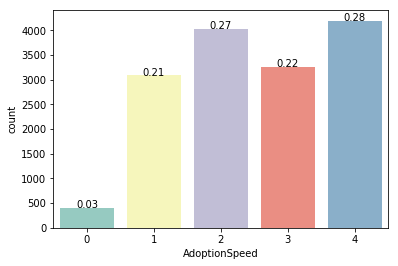

In [60]:
total = float(len(train)) # one person per row 
ax =sns.countplot(x="AdoptionSpeed", data=train,palette="Set3")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}'.format(height/total),
            ha="center") 


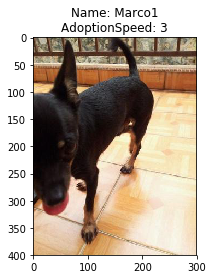

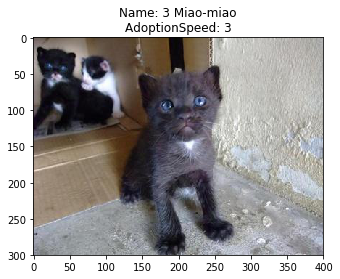

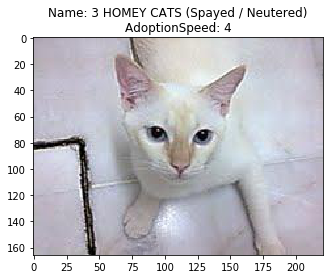

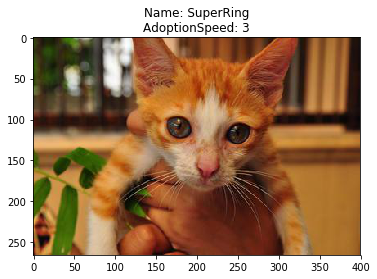

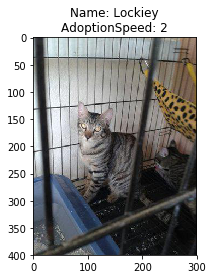

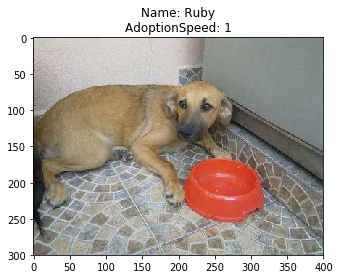

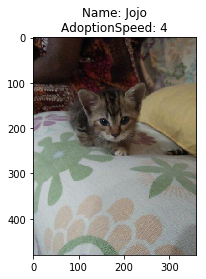

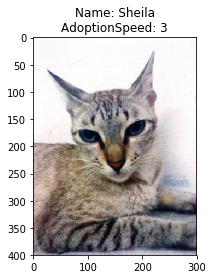

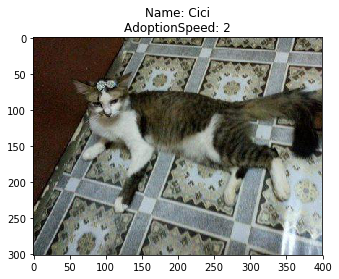

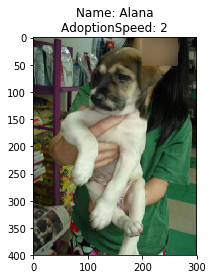

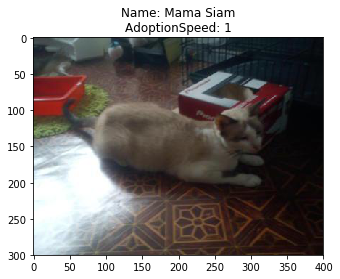

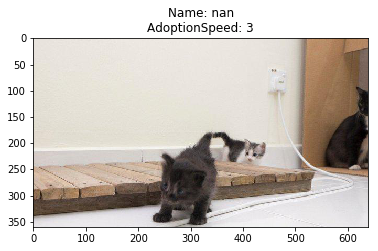

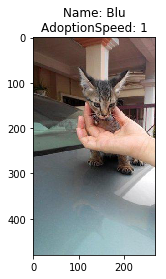

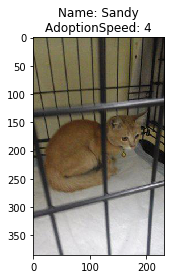

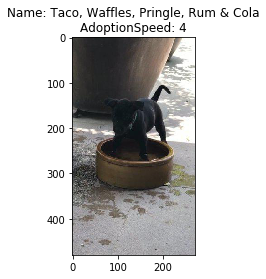

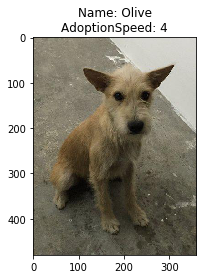

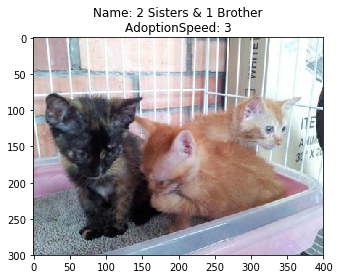

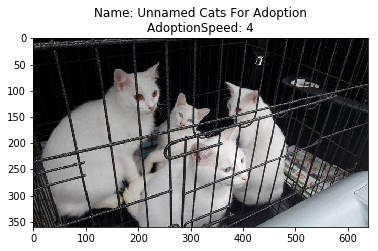

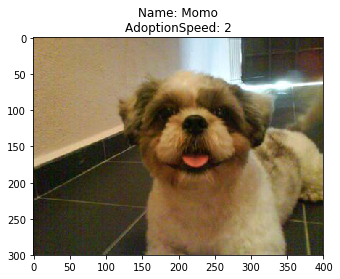

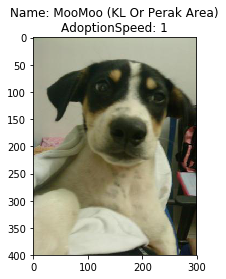

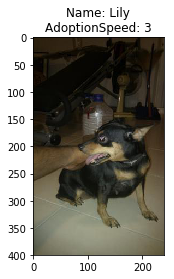

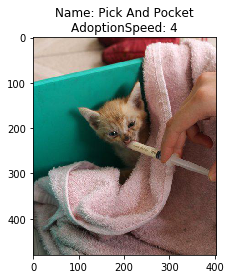

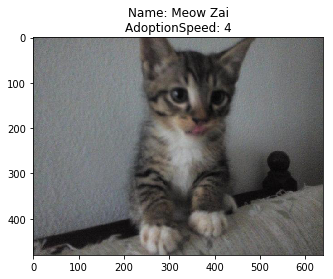

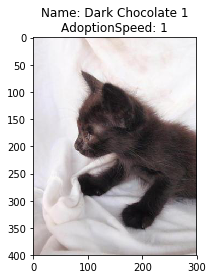

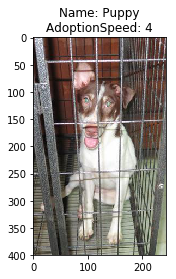

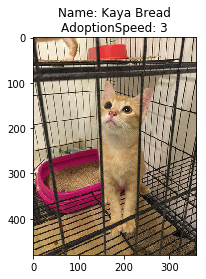

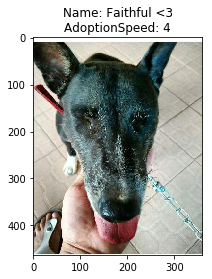

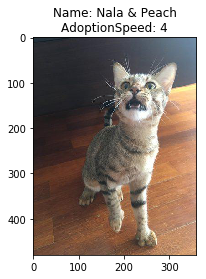

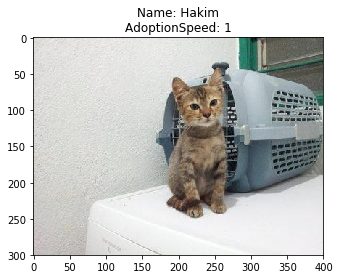

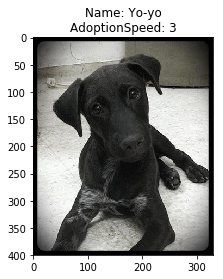

In [61]:
with zipfile.ZipFile(r'C:\Users\alexandra\Documents\Kaggle\train_images.zip',"r") as zfile:
      for filename in zfile.namelist()[:30]:
          data = zfile.read(filename)
          with Image.open( BytesIO(data)) as image:
                  plt.imshow(image)
                  pet_id = filename.split("-")[0]
                  plt.title(("Name: {}\nAdoptionSpeed: {}".format(*list(map(str, train[train.PetID==pet_id][["Name", "AdoptionSpeed"]].values.tolist()[0])))))
          plt.show()

### Target vs dependant variables

#### Graphic function

In [62]:
def graphics (train, target, features, ncat):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

    sns.countplot(x=target,hue=i, data=train,palette=('#00a1ff','#f9bc86','#f85cc2')).set_title('Distribution of Adoption Speed per '+ i)
 
    # CrossTab
    cross = pd.crosstab(train[target],train[i],margins=True)
    # Delete the All obs. per variable y
    cross = cross.drop(cross.index[len(cross)-1])
    
    for j in ncat:
        # Stacked Bar Plot
        if j ==0:
            Type1 = pd.DataFrame(cross.iloc[:,j]/cross['All'])
            ax1.bar(Type1.index.values, Type1[0], color='#00a1ff', label=cross.columns[0])
        if j==1:
            Type2 = pd.DataFrame(cross.iloc[:,j]/cross['All'])
            ax1.bar(Type2.index.values, Type2[0], bottom=Type1[0], color='#f9bc86', label=cross.columns[1])
        if j ==2:
            Type3 = pd.DataFrame(cross.iloc[:,j]/cross['All'])
            ax1.bar(Type3.index.values, Type3[0], bottom=[z+t for z,t in zip(Type1[0],Type2[0])], color='#f85cc2', label=cross.columns[2])
        if j ==3:
            Type4 = pd.DataFrame(cross.iloc[:,j]/cross['All'])
            ax1.bar(Type4.index.values, Type4[0], bottom=[n+z+t for n,z,t in zip(Type1[0],Type2[0],Type3[0])], color='#ef53c7', label=cross.columns[4])
 
    # Add title and axis names
    ax1.set_title('Adoption Speed vs '+i)
    ax1.set(xlabel='Adoption Speed', ylabel=i)
    ax1.legend(loc='upper right')

In [63]:
def graphics_num (train, target, features):

    num_analysis =train.groupby([features, target]).size().reset_index(name='counts')

    fig, ax = plt.subplots(1, 2, figsize=(17,7))
    # Add title and axis names
    sns.lineplot(x=features, y="counts", hue = target,data=num_analysis, ax=ax[0]).set_title(target+" vs "+features)
    sns.boxplot(x=target, y=features, data=train, palette="Set1", ax=ax[1]).set_title(target+" vs "+features)

#### Animal Type Analysis

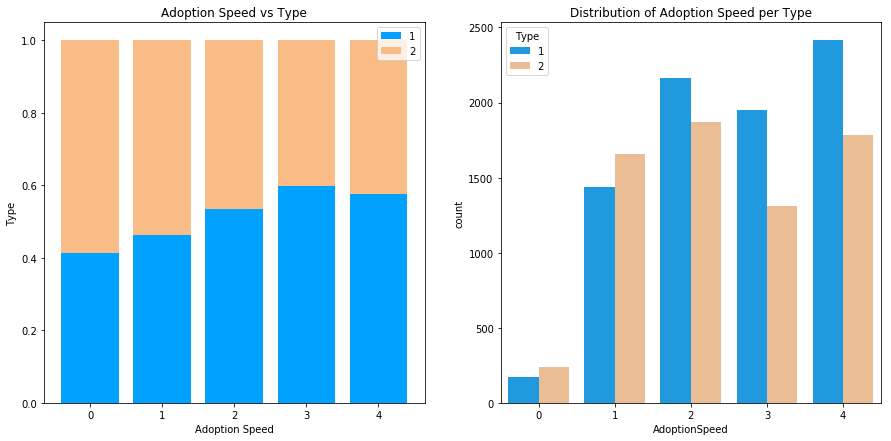

In [64]:
x= 'AdoptionSpeed'
features =["Type"]

for i in features:
    graphics(train,'AdoptionSpeed','Type',ncat=range(0,2))    #1. Dog 2.Cat

-  Type 1: Dog - Type 2: Cat. We see that cats are adopted more faster than dogs. 

#### Gender Analysis 

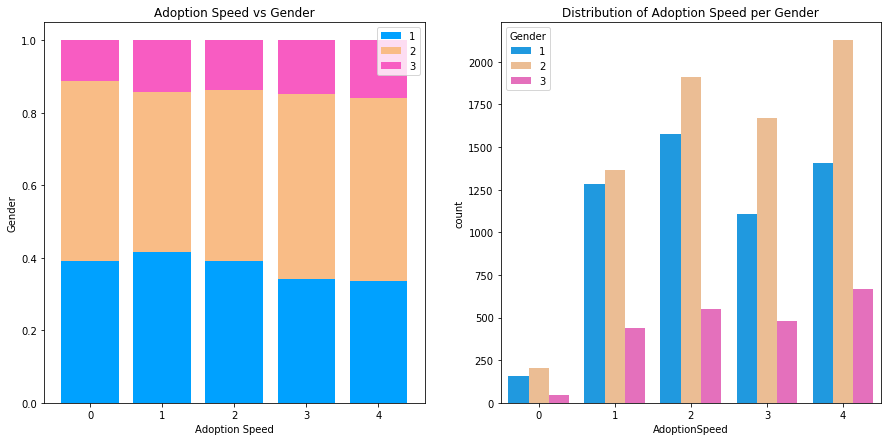

In [65]:
features=["Gender"]
for i in features:
    graphics(train,"AdoptionSpeed",i,ncat=range(0,3))    #1. Male, 2.Female 3. Mixed

-  More than one animals have tendance to be adopted after

#### Health Analysis

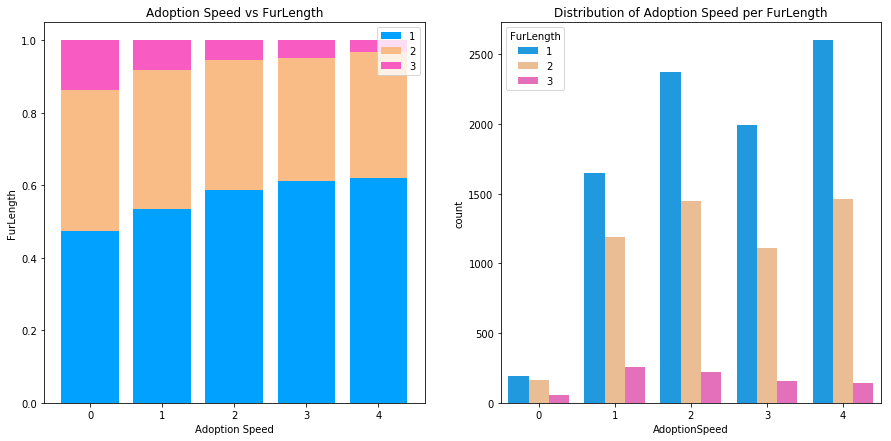

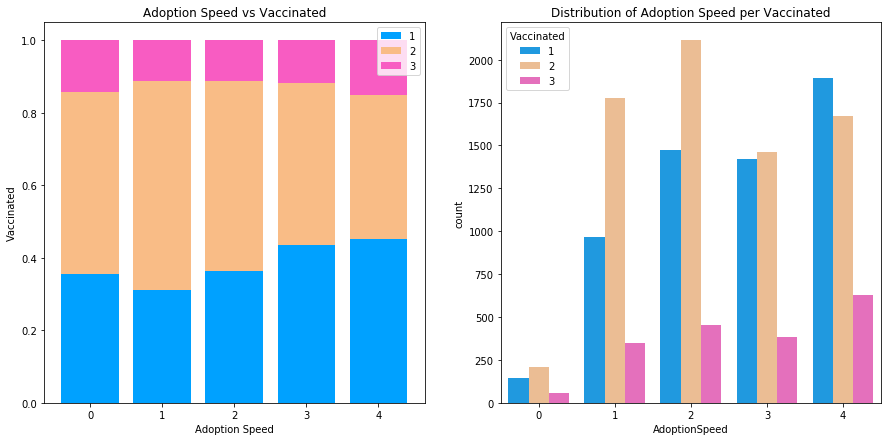

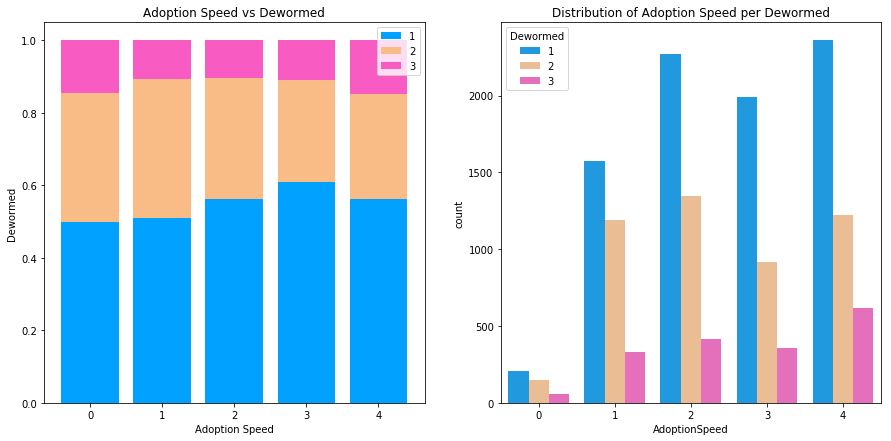

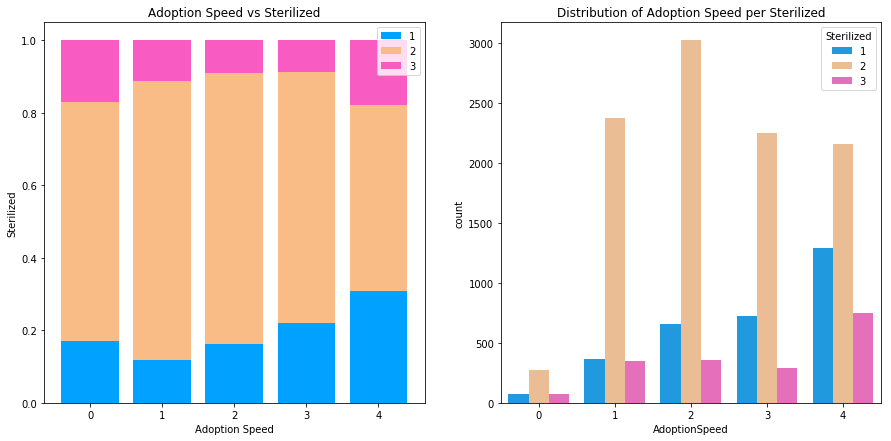

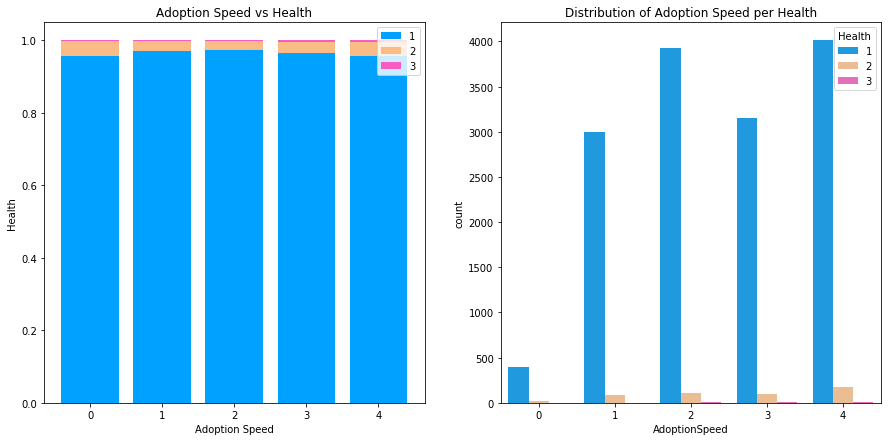

In [66]:
# Draw a nested analysis per Target
features =['FurLength','Vaccinated','Dewormed','Sterilized','Health']
target = ['AdoptionSpeed']
for i in features:
    graphics(train,"AdoptionSpeed",i,ncat=range(0,3))   

In [67]:
# FurLength (0 = Not Specified) - Health (0 = Not Specified) No missing values

train.loc[train['FurLength'] == 0]
train.loc[train['Health'] == 0 ]

,Unnamed: 0,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,...,MaturitySize_4,Sterilized_1,Sterilized_2,Sterilized_3,Vaccinated_1,Vaccinated_2,Vaccinated_3,FurLength_1,FurLength_2,FurLength_3


-  A Longer Fur favorise animal adoption (Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified))
-  Vaccination doesn't seem to have an impact on adoption (1 = Yes, 2 = No, 3 = Not Sure)
-  Dewormed doesn't seem to have an impact on adoption ...
-  Sterilized either, they prefer non sterilized pets?
-  Majority of Pets are healthy and in general they prefer health pets. 

#### Age & Mature Size analysis

In [68]:
#Count how many pets per Age (months) and Adoption Speed group
grouped_data = train.groupby(['AdoptionSpeed'])
grouped_data['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
AdoptionSpeed,,,,,,,,
0,410.0,10.451220,17.775118,0.0,2.0,3.0,12.0,120.0
1,3090.0,8.488350,15.746187,0.0,2.0,2.0,6.0,147.0
2,4037.0,8.823631,16.779013,0.0,2.0,3.0,6.0,156.0
3,3259.0,10.189936,18.672104,0.0,2.0,3.0,9.0,212.0
4,4197.0,13.667858,20.177460,0.0,3.0,6.0,15.0,255.0


-  The dataset contains young pets, 50% of them have less than 6 months.
-  We see that older pets are adopted slower or not adopted

Index([1, 2, 3, 4, 'All'], dtype='object', name='MaturitySize')


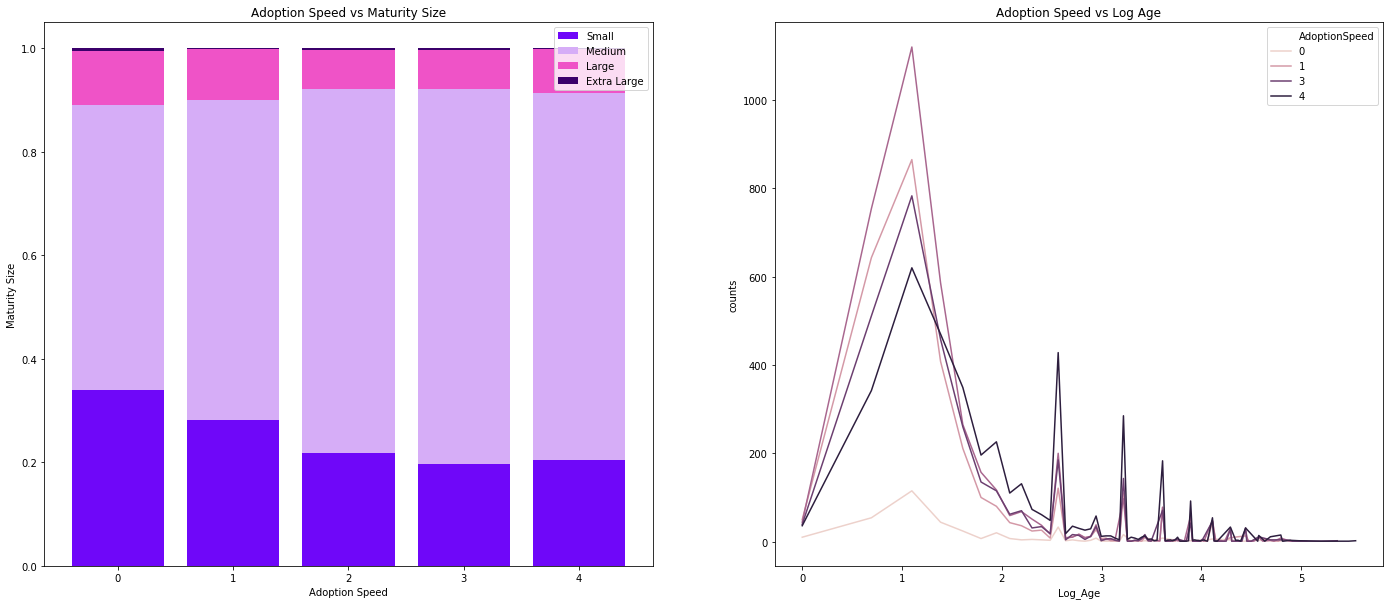

In [69]:
age_analysis =train.groupby(['Log_Age', 'AdoptionSpeed']).size().reset_index(name='counts')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,10))

sns.lineplot(x="Log_Age", y="counts", hue = "AdoptionSpeed",data=age_analysis).set_title("Adoption Speed vs Log Age")
# CrossTab
cross = pd.crosstab(train["AdoptionSpeed"],train['MaturitySize'],margins=True)
# Delete the All obs. per variable y
cross = cross.drop(cross.index[len(cross)-1])
print(cross.columns)
# Stacked Bar Plot
Type1 = pd.DataFrame(cross[1]/cross['All'])
Type2 = pd.DataFrame(cross[2]/cross['All'])
Type3 = pd.DataFrame(cross[3]/cross['All'])
Type4 = pd.DataFrame(cross[4]/cross['All'])

ax1.bar(Type1.index.values, Type1[0], label='Small', color='#6f07f9')
ax1.bar(Type2.index.values, Type2[0], bottom=Type1[0], color='#d6adf7', label='Medium')
ax1.bar(Type3.index.values, Type3[0], bottom=[z+t for z,t in zip(Type1[0], Type2[0])], label='Large', color='#ef53c7')
ax1.bar(Type4.index.values, Type4[0], bottom=[s+t+z for s,z,t in zip(Type1[0], Type2[0],Type3[0])], label='Extra Large', color='#3b006b')

# Add title and axis names
ax1.set_title('Adoption Speed vs Maturity Size')
ax1.set(xlabel='Adoption Speed', ylabel="Maturity Size")
ax1.legend(loc='upper right')


-  Small and Large pets are adopted faster

#### Color pets analysis

Text(0.5, 1.0, 'Distribution of Adoption Speed per Color')

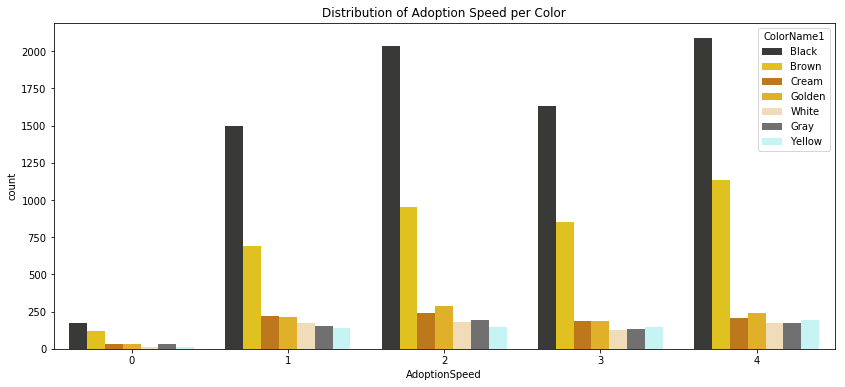

In [70]:
plt.figure(figsize=(14,6))
sns.countplot(x="AdoptionSpeed",hue="ColorName1", data=train,palette=('#393938','#ffd700','#d87c01',"#febf09","#f9dfb0","#707070","#befbfc")).set_title('Distribution of Adoption Speed per Color')

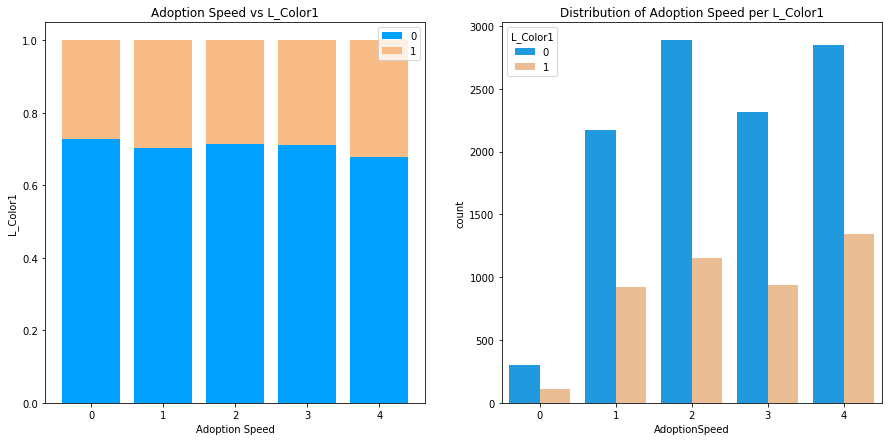

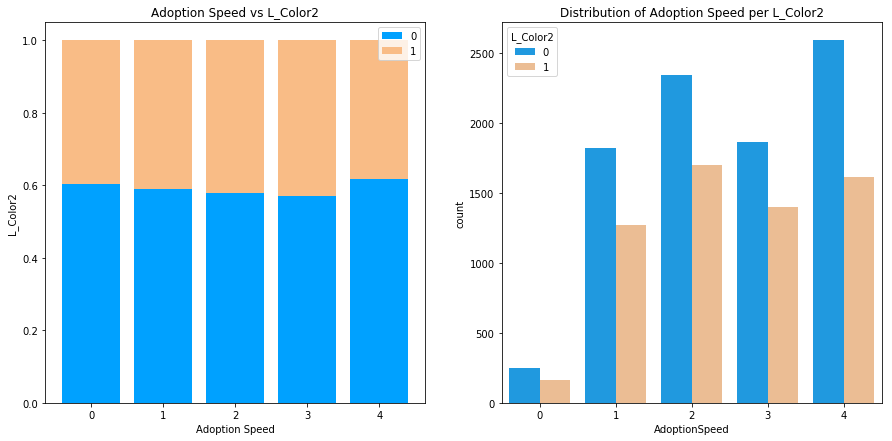

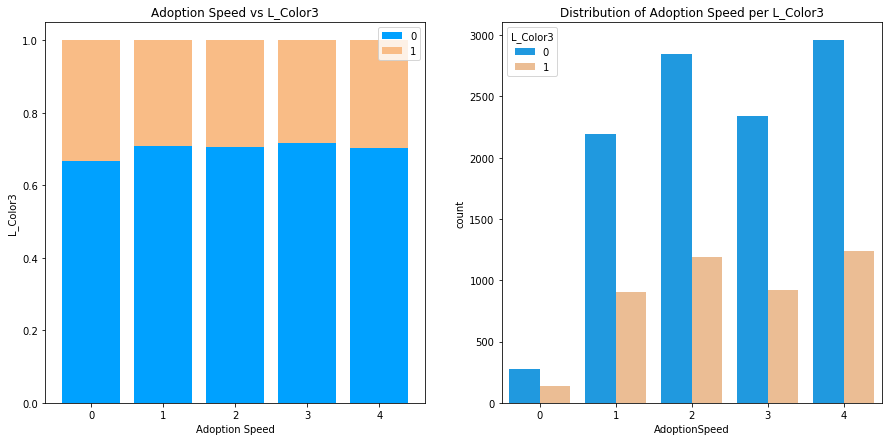

In [71]:
# Draw a nested analysis per Target
features =['L_Color1','L_Color2','L_Color3']
target = ['AdoptionSpeed']
for i in features:
    graphics(train,"AdoptionSpeed",i,ncat=range(0,2))   

-  1 Color or multiple colors doesn't seem to have an impact on Adoption Speed

#### Breed analysis

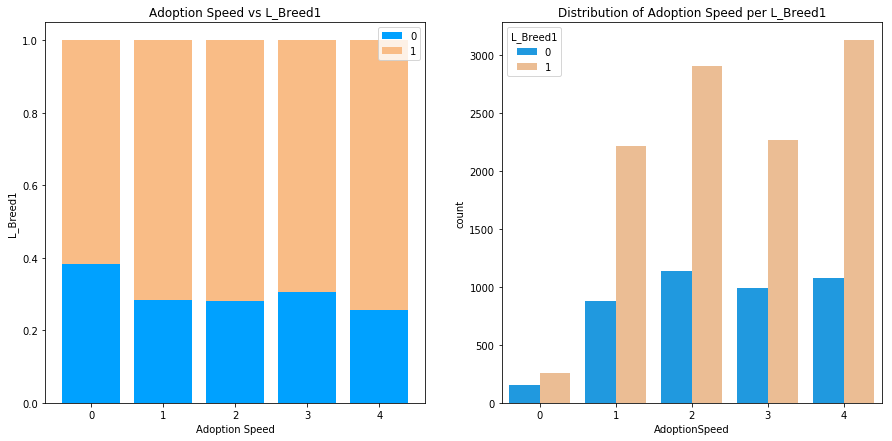

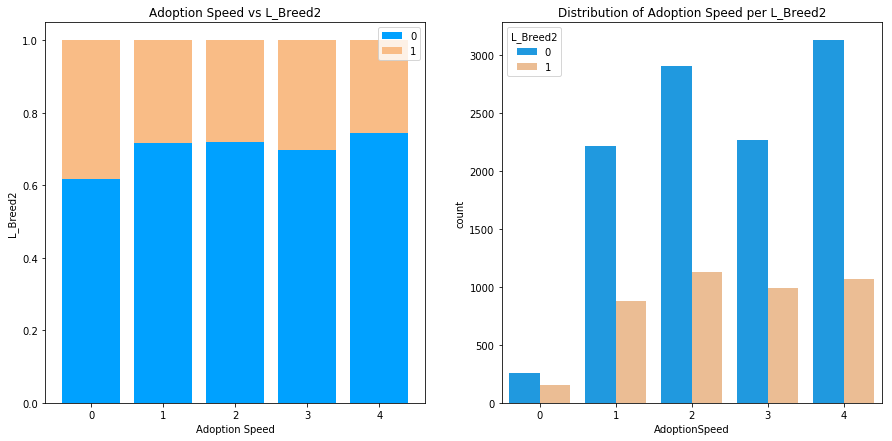

In [72]:
# Draw a nested analysis per Target
features =['L_Breed1','L_Breed2']
target = ['AdoptionSpeed']
for i in features:
    graphics(train,"AdoptionSpeed",i,ncat=range(0,2))   

-  Cat or dog with 2 breeds may have higher speed adption

#### Fee Adoption 

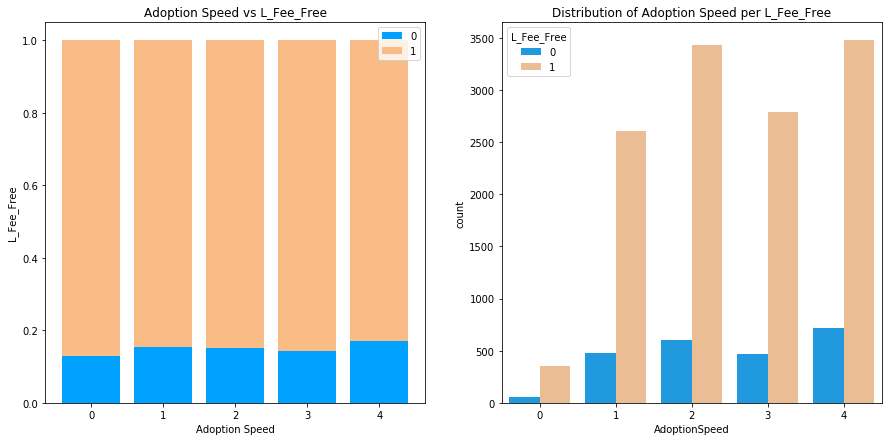

In [73]:
# Free Adoption 
features =['L_Fee_Free']
target = ['AdoptionSpeed']
for i in features:
    graphics(train,"AdoptionSpeed",i,ncat=range(0,2))   

-  Most animals are charge free 

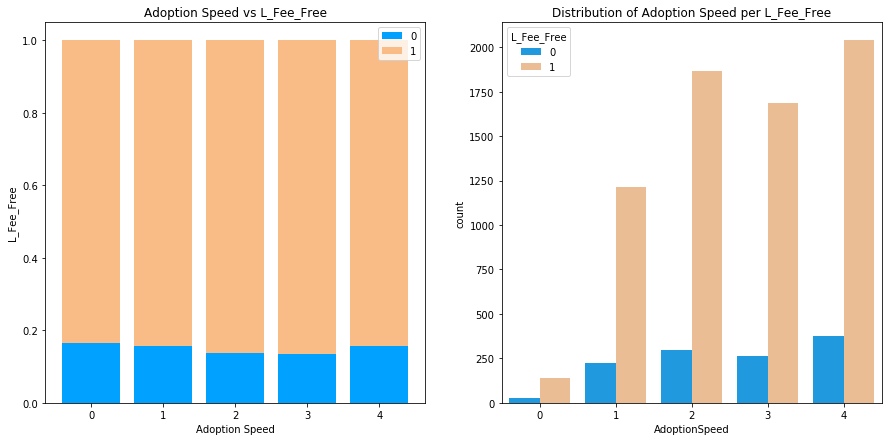

In [74]:
# Free Adoption Dogs 
features =['L_Fee_Free']
target = ['AdoptionSpeed']
for i in features:
    graphics(train.query('Type==1'),"AdoptionSpeed",i,ncat=range(0,2))   

Dogs freeness doesn't seem to impact the adoption

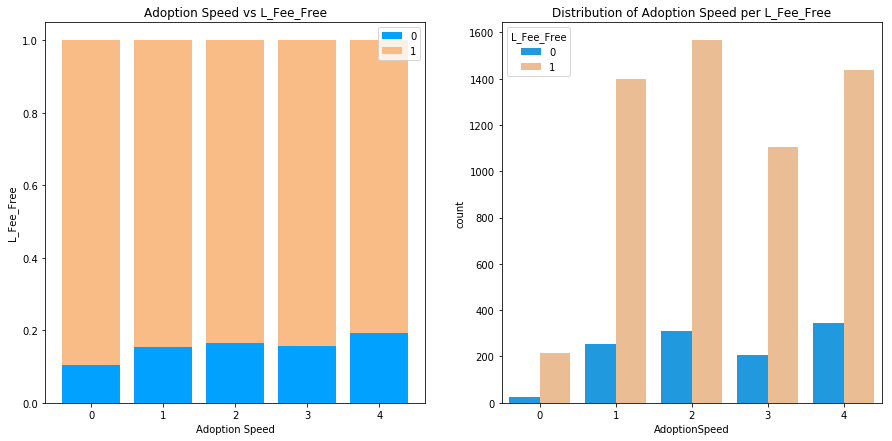

In [75]:
# Free Adoption Cats 
features =['L_Fee_Free']
target = ['AdoptionSpeed']
for i in features:
    graphics(train.query('Type==2'),"AdoptionSpeed",i,ncat=range(0,2))   

In [76]:
fee_analysis =train.query('Fee>0').groupby(['AdoptionSpeed'])
fee_analysis['Fee'].describe()


,count,mean,std,min,25%,50%,75%,max
AdoptionSpeed,,,,,,,,
0,53.0,170.849057,184.041320,1.0,50.0,100.0,200.0,1000.0
1,479.0,140.774530,163.265164,1.0,50.0,100.0,200.0,2000.0
2,607.0,143.540362,156.574884,1.0,50.0,100.0,200.0,1000.0
3,470.0,139.731915,185.491189,1.0,50.0,100.0,200.0,3000.0
4,721.0,124.080444,115.714419,1.0,50.0,100.0,160.0,750.0


-  The result is interesting for No adoption after 100 days the fee is less higher (in mean) than for the Adoption between 1 and 10 days 
- Free cats seems to be adopted faster

#### State analysis

<img src="https://i.imgur.com/NWIf9Gf.png" alt="state" title="state" width="600" height="400" /> 

KeyError: 'StateName'

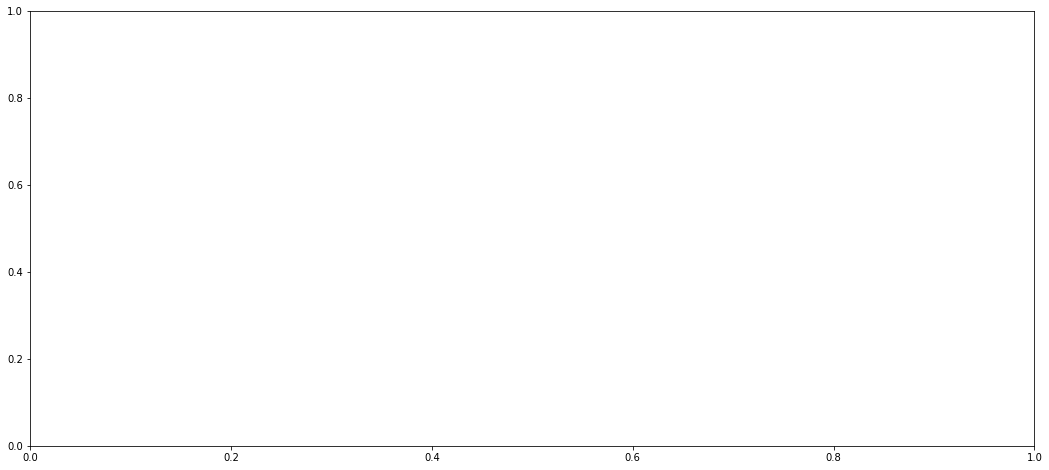

In [77]:
fig= plt.subplots(figsize=(18,8))
ax = sns.countplot(x="StateName", data=train, order = train["StateName"].value_counts().index)
# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='green', ha='center', va='bottom')

In [ ]:
fig= plt.subplots(figsize=(24,12))
ax = sns.countplot(x="StateName",  hue="AdoptionSpeed",data=train, palette="Set2")

-  In Kuala Lumpur and Pulau Pinang the process seems slower 
-  Selangor is the suburb of Kuala Lumpur

#### RescuerID analysis

Number of pets per Rescuer and List the Top 10 Rescuer

In [ ]:
rescuer_analysis =train.groupby(['RescuerID']).size().reset_index(name='counts')
rescuer_analysis['counts'].describe()

-  In mean a Rescuer have around 2 pets, let's see the top Rescuer ! 

In [ ]:
Top4 =rescuer_analysis.sort_values('counts',ascending=False).head(4)
Top4

In [ ]:
train_toprescuer = train.loc[train['RescuerID'].isin(Top4['RescuerID'].values.tolist())]

fig = plt.subplots(figsize=(24,10))

ax = sns.countplot(x="RescuerID",data=train_toprescuer ,hue="AdoptionSpeed" ,palette="Set3")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='blue', ha='center', va='bottom') 

- the First Rescuer seems to have faster adoption

###### Rescuer with more pets have higher Adoption Rate? YES!

In [ ]:
# Best Rescuer for minimum 10 pets
rescuer_speed =train.groupby(['RescuerID','AdoptionSpeed']).size().reset_index(name='N_pets_speed')

pets_total = train.groupby(['RescuerID']).size().reset_index(name='N_pets_total')
rescuer_analysis= pd.merge(pets_total, rescuer_speed, left_on='RescuerID', right_on='RescuerID', how='inner')
rescuer_analysis['pct_pets'] = rescuer_analysis['N_pets_speed']/rescuer_analysis['N_pets_total']

#Big Rescuer
rescuer_analysis.query("N_pets_total>10").groupby("AdoptionSpeed")['pct_pets'].describe().reset_index()


In [ ]:
#Small Rescuer
rescuer_analysis.query("N_pets_total<10").groupby("AdoptionSpeed")['pct_pets'].describe().reset_index()

#### Video and Photo Analysis

In [ ]:
train['PhotoAmt'].describe()

In [ ]:
fig = plt.subplots(figsize=(12,5))
sns.distplot(train['PhotoAmt'])

In [ ]:
train.groupby('AdoptionSpeed')['PhotoAmt'].mean()

In [ ]:
# Photo? 
features =['L_NoPhoto']
target = ['AdoptionSpeed']
for i in features:
    graphics(train,"AdoptionSpeed",i,ncat=range(0,2))   

In [ ]:
train['VideoAmt'].describe()

In [ ]:
fig = plt.subplots(figsize=(12,5))
sns.distplot(train['VideoAmt'])

In [ ]:
# Video? 
features =['L_NoVideo']
target = ['AdoptionSpeed']
for i in features:
    graphics(train,"AdoptionSpeed",i,ncat=range(0,2))   

-  Video and Photo Amount doesn't seem to have a huge impact on Adoption Speed

#### Quantity Analysis

In [ ]:
graphics_num(train,'AdoptionSpeed','Log_Age')

We saw that more than 5 pets it seems extreme values. The description as example is **6 precious little puppies up for adoption. 4 males, 2 females...** proposing one or more puppies 

#### Sentiment Data Analysis

In [ ]:
train.groupby('AdoptionSpeed')['sentiment_document_score'].mean()

In [ ]:
train.groupby('AdoptionSpeed')['sentiment_document_magnitude'].mean()

In [ ]:
graphics_num(train,'AdoptionSpeed','sentiment_document_score')

-  We see some more negative score when the Adoption is slower
-  Thus we create variable negative Score 

In [ ]:
graphics_num(train,'AdoptionSpeed','sentiment_document_magnitude')

In [ ]:
features =['L_scoreneg']
target = ['AdoptionSpeed']
for i in features:
    graphics(train,"AdoptionSpeed",i,ncat=range(0,2))   

#### Pet's Name Analysis

In [ ]:
#Impact on missing name or incorrect name

features =['L_Name_missing','L_Name_incorrect']
target = ['AdoptionSpeed']
for i in features:
    graphics(train,"AdoptionSpeed",i,ncat=range(0,2))   

-  Missing Name has an impact on Adoption Speed. Let's Analyse the Name !

In [ ]:
train_dog=train.loc[train['Type'] == 1]
train_cat=train.loc[train['Type'] == 2]

text_cat = ','.join(str(v) for v in train_cat.Name)
text_dog = ','.join(str(v) for v in train_dog.Name)
print ("There are {} words in the combination of all Name.".format(len(text_dog)))

In [ ]:
response_cat = requests.get("https://i.imgur.com/VIUvAxb.jpg")
cat_mask = np.array(Image.open(BytesIO(response_cat.content)))
response_dog = requests.get("https://i.imgur.com/IWGYuPN.jpg")
dog_mask = np.array(Image.open(BytesIO(response_dog.content)))

#dog_mask = np.array(Image.open(r"C:\Users\alorenzodebrionne\Pictures\dog.jpg"))
#cat_mask= np.array(Image.open(r"C:\Users\alorenzodebrionne\Pictures\cat.jpg"))

def word_cloud(text,mask):
    # Create a word cloud image
    wc = WordCloud(background_color="white", max_words=300, mask=mask,
                   contour_width=3, contour_color='pink')

    # Generate a wordcloud
    wc.generate(text)

    # show
    plt.figure(figsize=[20,10])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

word_cloud(text_dog,dog_mask)

In [ ]:
word_cloud(text_cat,cat_mask)

#### Image Metadata Analysis

<img src="https://i.imgur.com/iTSmFys.jpg" alt="pet" title="pet" width="400" height="300" />  Google API description : dog, dog breed, street dog, dog like mammal, dog breed group, snout, carnivoran...

In [ ]:
text_cat = ','.join(str(v) for v in train_cat.Description)
text_dog = ','.join(str(v) for v in train_dog.Description)
print ("There are {} words in the combination of all Description for Cats.".format(len(text_cat)))

In [ ]:
word_cloud(text_dog,dog_mask)

In [ ]:
word_cloud(text_cat,cat_mask)

In [ ]:
# Draw a nested analysis per Target
features =['metadata_topicality_max','metadata_topicality_mean','metadata_topicality_min','metadata_topicality_0_mean','metadata_topicality_0_max','metadata_topicality_0_min','L_metadata_0_cat_sum','L_metadata_0_dog_sum','L_metadata_any_cat_sum','L_metadata_any_dog_sum']
target = ['AdoptionSpeed']
for i in features:
    graphics_num(train,"AdoptionSpeed",i)   

A higher "Topicality" means a faster Adoption. 
Also if the first object see is a cat or a dog have an impact on Adoption Speed.

#### Image Quality Analysis

In [ ]:
# Draw a nested analysis per Target
features =['pixel_mean','blur_mean','pixel_min','blur_min','pixel_max','blur_max','pixel_sum','blur_sum']
for i in features:
    graphics_num(train,"AdoptionSpeed",i)

Pixels or Blur seem to have no impact on Adoption Speed

## Correlation Matrix

In [ ]:
def plot_correlation_matrix(df):
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(30, 15))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
plot_correlation_matrix(train)